In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/drive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai import *

In [0]:
path = "/content/drive/My Drive/cars"

In [31]:
path

'/content/drive/My Drive/cars'

In [7]:
!ls "/content/drive/My Drive/cars"

cleaned.csv  Fortuner  Fortuner.csv  Innova  Innova.csv  models


In [0]:
classes = ['Innova','Fortuner']

DOWNLOADING Fortuner Car Images from csv

In [25]:
download_images("/content/drive/My Drive/cars/Fortuner.csv", "/content/drive/My Drive/cars/Fortuner", max_pics=200)

DOWNLOADING Innova Car Images from csv

In [26]:
download_images("/content/drive/My Drive/cars/Innova.csv", "/content/drive/My Drive/cars/Innova", max_pics=200)

In [34]:
for c in classes:
    print(c)
    verify_images(path+"/"+c, delete=True, max_size=500)

Innova


Fortuner


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['Fortuner', 'Innova']

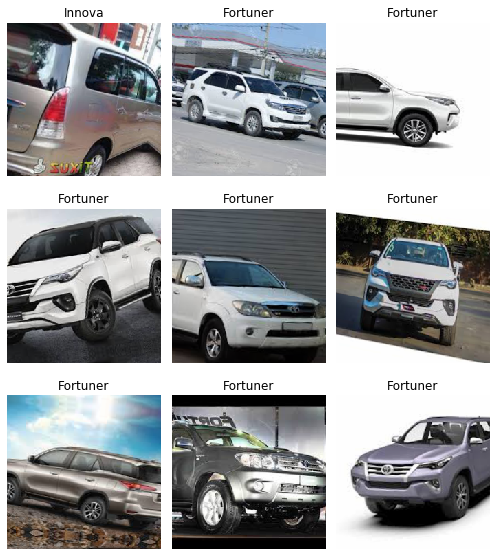

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Fortuner', 'Innova'], 2, 295, 73)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.273762,1.437882,0.479452,00:04
1,1.005400,0.722674,0.205479,00:04
2,0.816754,0.694717,0.150685,00:04
3,0.702786,0.696925,0.164384,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


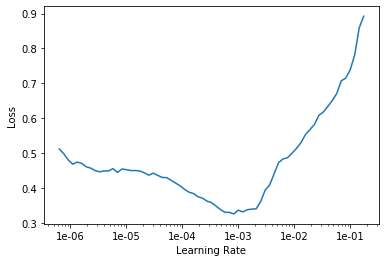

In [24]:
learn.recorder.plot()


In [25]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.401903,0.793877,0.260274,00:04
1,0.399479,0.883882,0.287671,00:04
2,0.361185,0.957660,0.260274,00:04
3,0.316478,0.801273,0.246575,00:04


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

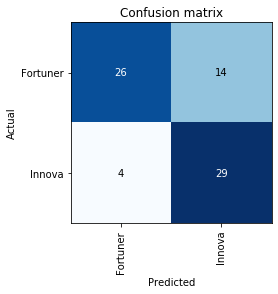

In [29]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

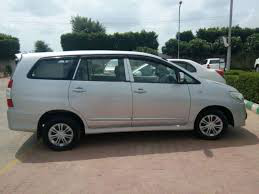

In [37]:
img = open_image(path+'/'+"Img1.jpeg")
img

In [0]:
learn = load_learner(path)

In [38]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Innova